Alright nördar dethär är en jupyter notebook försök fatta eller ba gå hem, tönt

Uner är alla öibrarys

In [148]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.nddata import Cutout2D
from astropy import units
from astropy.io import fits
from astropy.modeling.functional_models import Gaussian2D
import glob
from astropy.visualization import astropy_mpl_style
from astropy.io import fits
from astropy.utils.data import get_pkg_data_filename
from clustar.core import ClustarData


Define Size of image in pixels and object in image
The object is a standard object from astropy, the idea is to use one of our own gaussian.

In [149]:
y, x = np.mgrid[0:500, 0:500]
data = Gaussian2D(1, 250, 250, 10, 5, theta=5)(x, y)


Here we plot the actual image

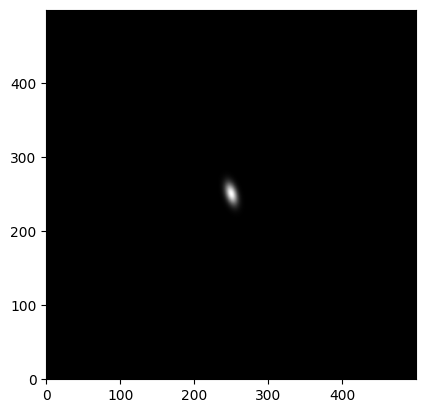

In [150]:
plt.imshow(data, origin='lower', cmap='gray')
plt.show()

Lets say we want to crop the image to a standard size 

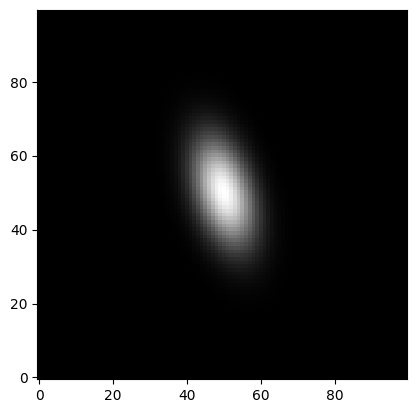

In [43]:
crop_center = (250, 250)
crop_size = units.Quantity((100, 100), units.pixel)
crop = Cutout2D(data, crop_center, crop_size)

plt.imshow(crop.data, origin='lower', cmap='gray')
plt.show()


Load a FITS file instead of simulating

In [44]:
#Get all the fits files adresses un a dictionary
filenames = glob.glob('data/*.fits')
data_set = {}

Find object of interest in FITS-file and return pos 

In [157]:
def find_object_pos(file):

    #group_factor is the threshold for the gaussian detection,
    #how clumped together the deviations from the mean 
    #must be to be considered a gaussian
    cd = ClustarData(path=file, group_factor=.4)

    disk = cd.groups[0]
    bounds = disk.image.bounds
    x = (bounds[2] + bounds[3])/2 
    y = (bounds[0] + bounds[1])/2
    
    #print(x, y)
    cd.identify()
    return (x, y)

#Many gaussian found
#find_object_pos('data/member.uid___A001_X1465_X2adc.AB_Auriga_sci.spw7.mfs.I.pbcor.fits')

#many gaussian found
#find_object_pos('data/member.uid___A001_X1465_X2adc.AB_Auriga_sci.spw7.mfs.I.pbcor.fits')

#Offcenter clear gaussian
#find_object_pos('data/Ab335_2018_band7_line_0.fits')



Go through all the FITS adresses and print the graphs

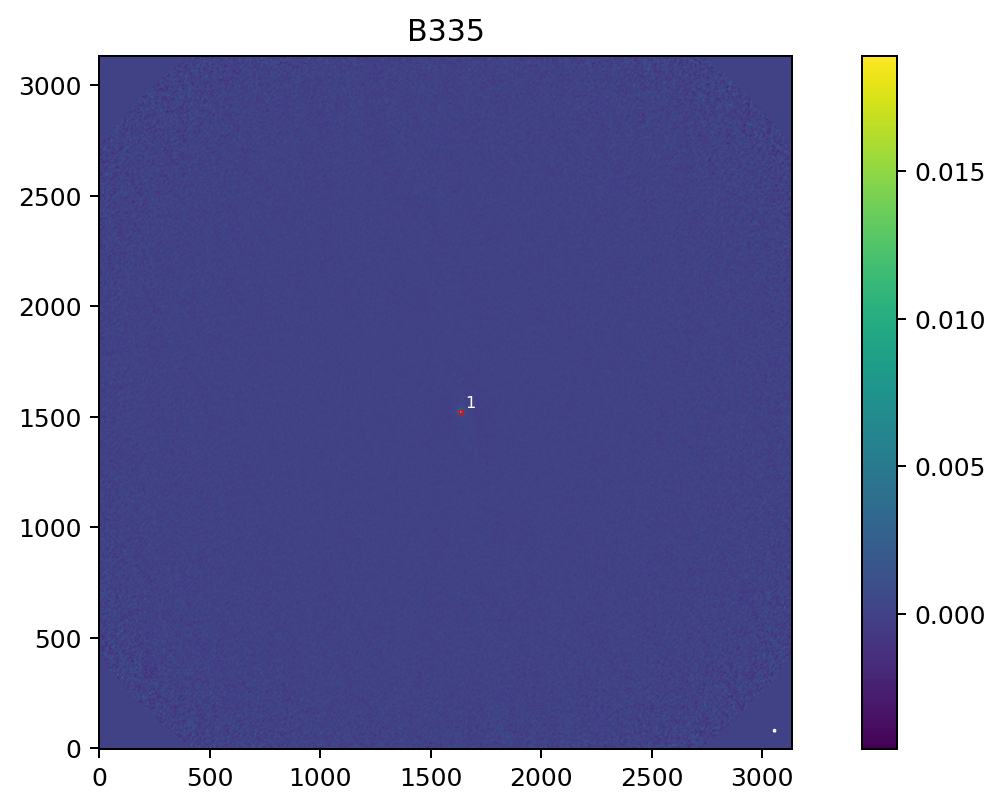

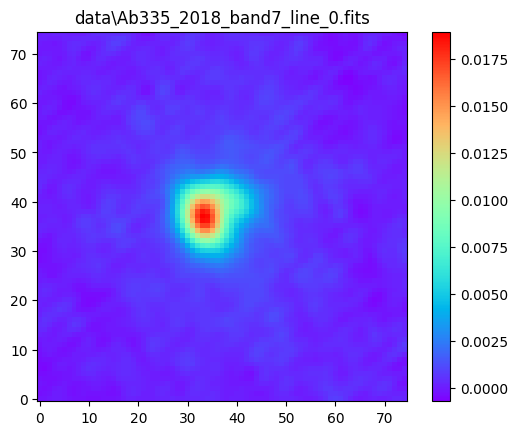

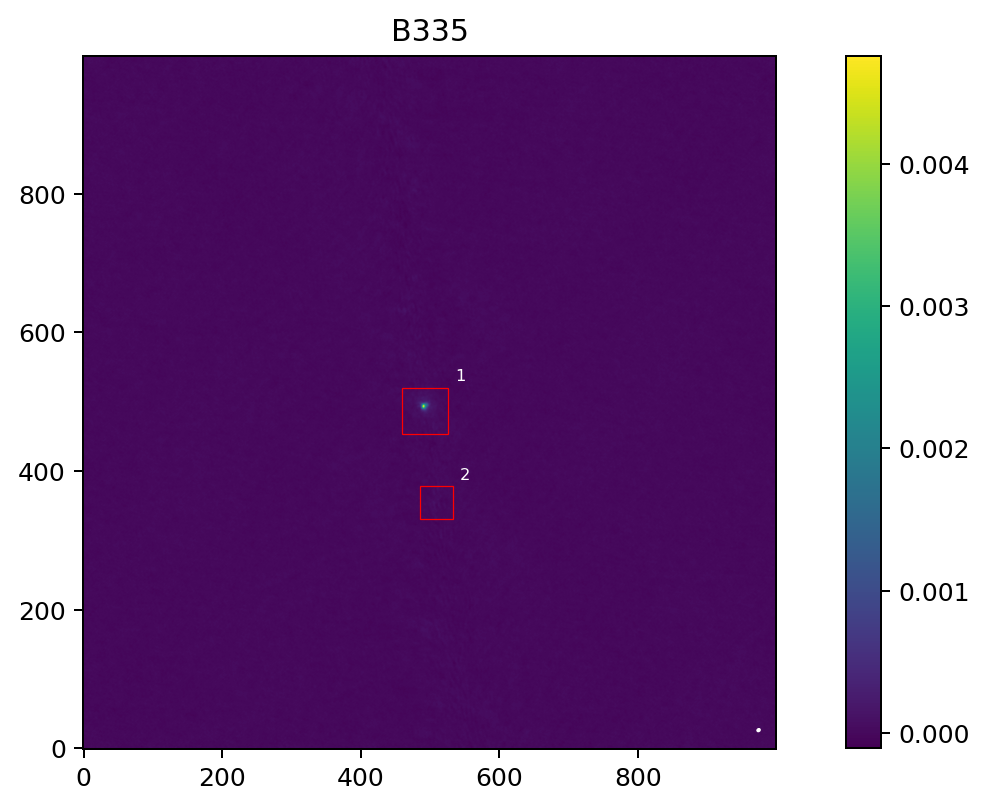

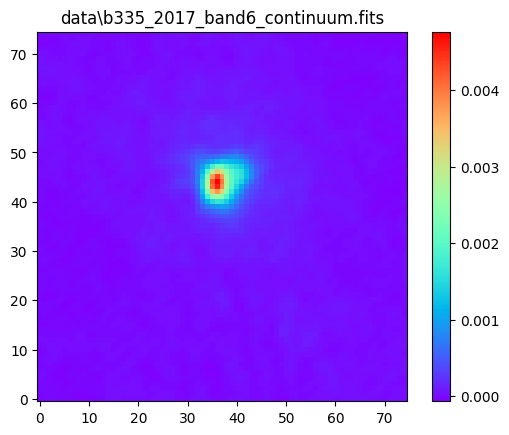

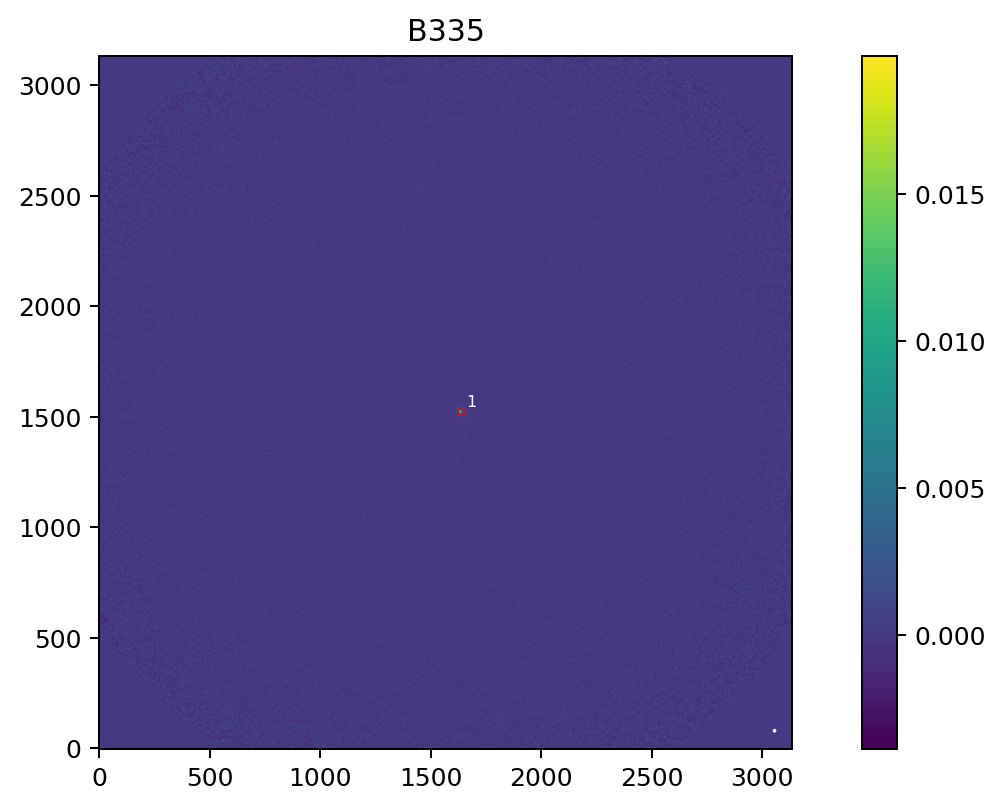

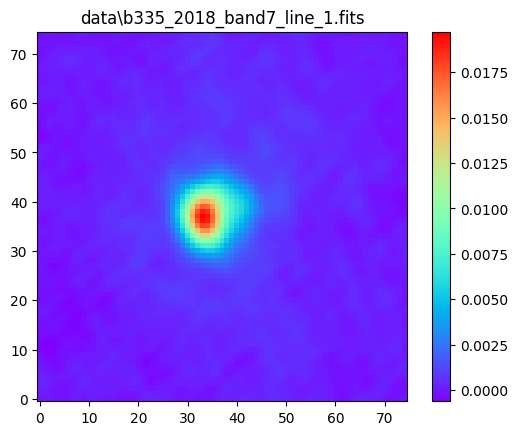

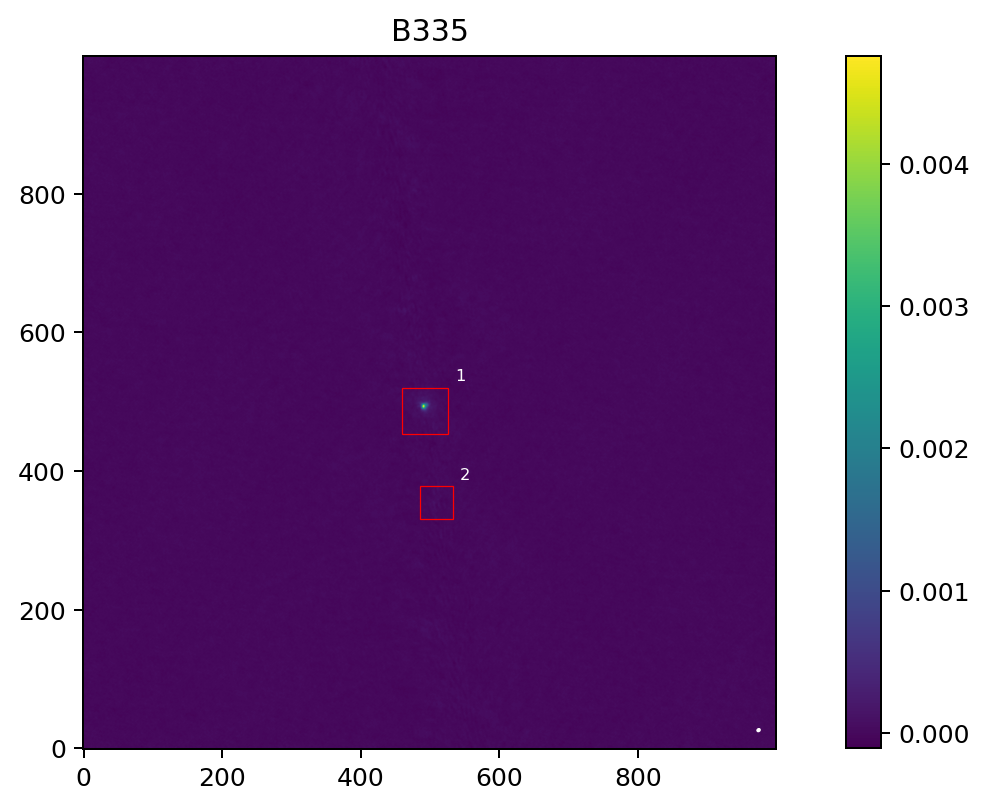

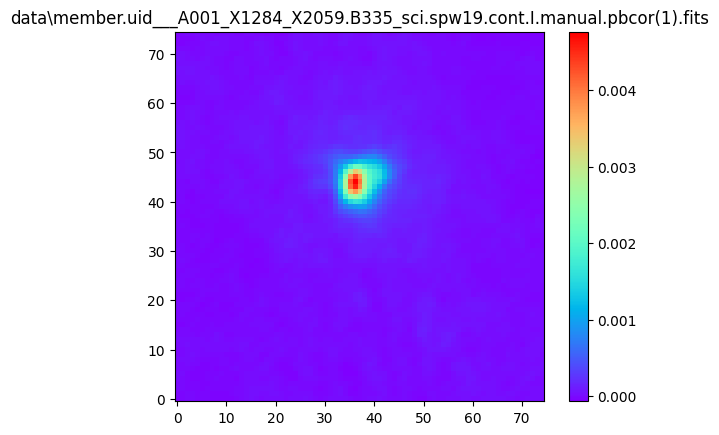

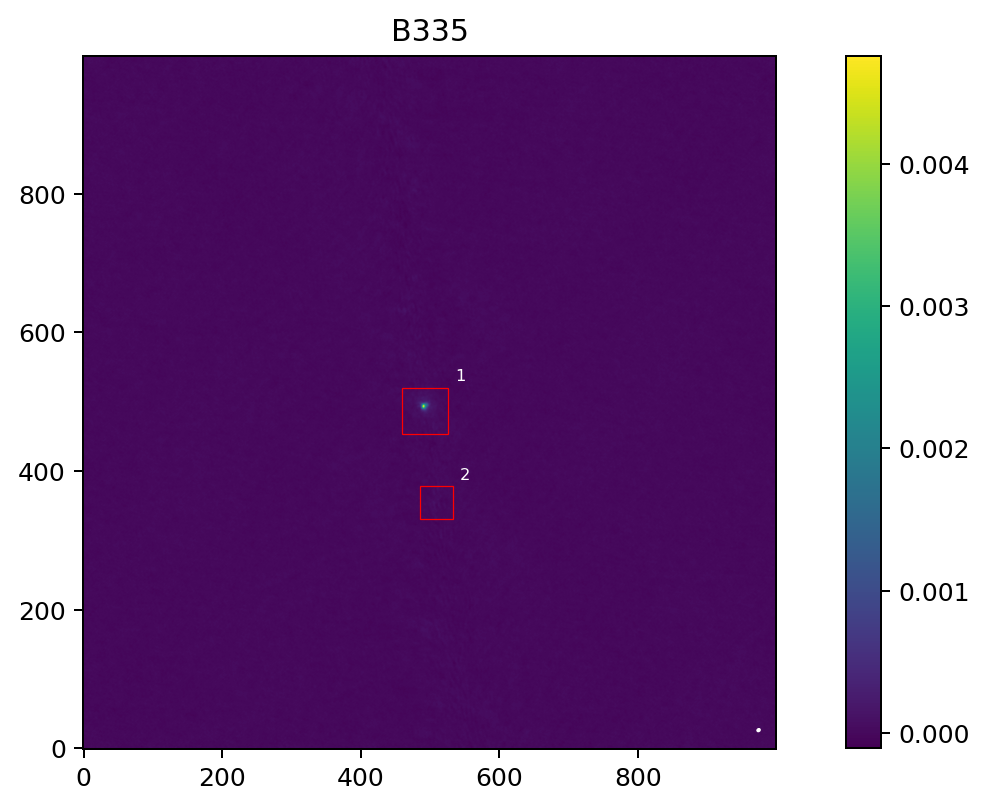

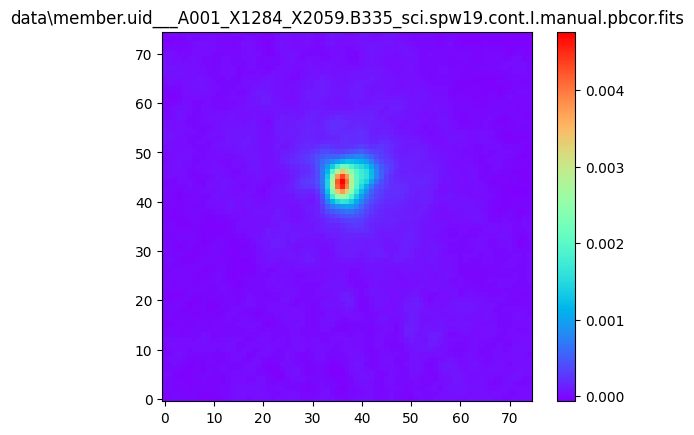

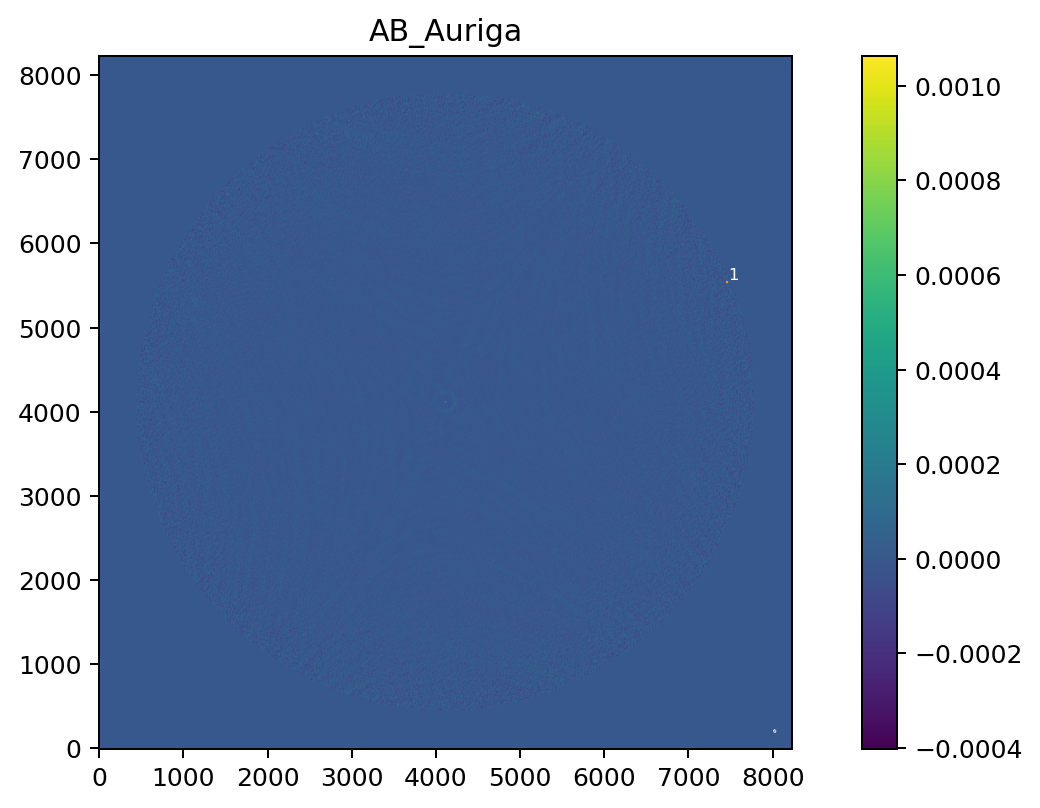

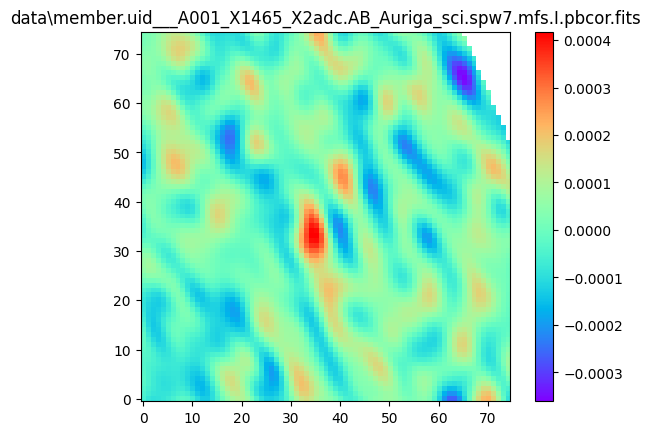

In [158]:
for file in filenames:
    # Read the data folder and get the fits files
    img_header = fits.open(file)
    img_data = fits.getdata(file)

    #Data shape is (1, 1, x, y) we want it to be (x, y)
    
    img_data.shape = (img_data.shape[2], img_data.shape[3])

    # Set the size of the crop in pixels
    im_size = 75
    crop_size = units.Quantity((im_size, im_size), units.pixel)

    # Later we will crop around objects of interest
    img_crop = Cutout2D(img_data, find_object_pos(file), crop_size)
    
    # # Crop the image around the center
    # crop_center = ((img_data.shape[0])/2, (img_data.shape[1])/2)
    # img_crop = Cutout2D(img_data, crop_center, crop_size)


    plt.figure()
    plt.imshow(img_crop.data, origin='lower', cmap='rainbow')
    plt.colorbar()
    plt.title(file)

Use clustar to find the coordinates of a gaussian instead of just croping int the middle

In [10]:
from clustar.search import Clustar
from clustar.core import ClustarData

from scipy import ndimage
from matplotlib.patches import Rectangle, Ellipse
import matplotlib.pyplot as plt
import numpy as np


In [153]:
# cs = Clustar(radius_factor=0.95, threshold=0.025)
# cs.run(directory='data/')


# crop_coords = []
# for object in cs:
#     crop_coords.append(object.display)

cd = ClustarData(path=file, threshold=0.025)

disk = cd.groups[0]
bounds = disk.image.bounds
x = (bounds[0] + bounds[1])/2
y = (bounds[2] + bounds[3])/2

img = fits.open(file)
img_header = img[0].header
img_data = fits.getdata(file)

image = disk.Image(data=img_data, header=img_header)


# x = image.x
# y = image.y
# print((x, y))

# cd.identify()
#cd = cs.data[0]
# image = ClustarData.Image(cd.data, cd.header)
# p = image.pos
#cs.display(category='all')


AttributeError: 'Group' object has no attribute 'Image'

In [23]:

# img_sample = {
#     # 'PICTTYPE': img_header[0].header['PICTTYPE'],
#     'ff_geometry': img_data.shape,
#     'crop_geometry': img_crop.shape,
#     # 'EXPTIME': img_header[0].header['EXPTIME'],
#     # 'CCD-TEMP': img_header[0].header['CCD-TEMP'],
#     'min': np.min(img_crop.data),
#     'max': np.max(img_crop.data),
#     'mean': np.mean(img_crop.data),
#     'std_dev': np.std(img_crop.data),
#     'data': img_crop.data
# }

# # Save the cropped image in a dictionary
# data_set[file] = img_sample


# for img_sample in data_set:
#       plt.figure()
#       plt.imshow(Cutout2D.data, origin='lower', cmap='rainbow')
#       plt.colorbar()


# for image in data_set.items():
#     plt.imshow(image['data'], origin='lower', cmap='gray')
#     plt.colorbar()
#     plt.show()


TypeError: tuple indices must be integers or slices, not str

In [ ]:

    # img_sample = {
    #     # 'PICTTYPE': img_header[0].header['PICTTYPE'],
    #     'ff_geometry': img_data.shape,
    #     'crop_geometry': img_crop.shape,
    #     # 'EXPTIME': img_header[0].header['EXPTIME'],
    #     # 'CCD-TEMP': img_header[0].header['CCD-TEMP'],
    #     'min': np.min(img_crop.data),
    #     'max': np.max(img_crop.data),
    #     'mean': np.mean(img_crop.data),
    #     'std_dev': np.std(img_crop.data),
    #     'data': img_crop.data
    # }

    # # Save the cropped image in a dictionary
    # data_set[file] = img_sample



# for img_sample in data_set:
#       plt.figure()
#       plt.imshow(Cutout2D.data, origin='lower', cmap='rainbow')
#       plt.colorbar()



# for image in data_set.items():
#     plt.imshow(image['data'], origin='lower', cmap='gray')
#     plt.colorbar()
#     plt.show()